In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2  # 특성 선택 함수
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트 회귀모델

In [40]:
# 데이터 가져오기
apart_df = pd.read_csv("../data/20250605_102903_seoul_real_estate.csv")
interest_rate_df = pd.read_csv("../data/deposit_lending_rate.csv")
school_df = pd.read_csv("../data/seoul_shcool_info.csv")
subway_df = pd.read_csv("../data/seoul_subway_encoding.csv")

In [41]:
# 아파트 데이터 결측치 확인
apart_summary = apart_df.describe(include='all').T # 각 컬럼별 요약 통계
apart_missing = apart_df.isnull().sum() # 결측치 개수
apart_missing_ratio = (apart_missing / len(apart_df)) * 100 if len(apart_df) > 0 else apart_df


missing_data = pd.DataFrame()

# apart_summary['missing_count'] = apart_missing
# apart_summary['missing_ratio(%)'] = apart_missing_ratio

missing_data['missing_count'] = apart_missing
missing_data['missing_ratio(%)'] = apart_missing_ratio

missing_data

,missing_count,missing_ratio(%)
RCPT_YR,0,0.000000
CGG_CD,0,0.000000
CGG_NM,1,0.000732
STDG_CD,0,0.000000
STDG_NM,0,0.000000
LOTNO_SE,6,0.004390
LOTNO_SE_NM,6,0.004390
MNO,7,0.005122
SNO,7,0.005122
BLDG_NM,0,0.000000


In [42]:
# 금리 데이터 결측치 확인
interest_rate_df.describe(include='all')
rate_missing = interest_rate_df.isnull().sum()
rate_missing_ratio = (rate_missing / len(interest_rate_df)) * 100 if len(apart_df) > 0 else apart_df

missing_data = pd.DataFrame()

missing_data['missing_count'] = rate_missing
missing_data['missing_ratio(%)'] = rate_missing_ratio

missing_data

,missing_count,missing_ratio(%)
Unnamed: 0,0,0.0
landing,0,0.0
deposit,0,0.0
diff,0,0.0
Unnamed: 4,354,100.0


In [43]:
# 학교 데이터 결측치 확인
school_df.describe(include='all')
school_missing = school_df.isnull().sum()
school_missing_ratio = (school_missing / len(school_df)) * 100 if len(school_df) > 0 else school_df

missing_data = pd.DataFrame()

missing_data['missing_count'] = school_missing
missing_data['missing_ratio(%)'] = school_missing_ratio

missing_data

,missing_count,missing_ratio(%)
school_type,0,0.000000
type,0,0.000000
school_name,0,0.000000
address,0,0.000000
high_school_type,1095,27.820122


In [44]:
# 지하철 데이터 결측치 확인
subway_df.describe(include='all')
subway_missing = subway_df.isnull().sum()
subway_missing_ratio = (subway_missing / len(subway_df)) * 100 if len(subway_df) > 0 else subway_df

missing_data = pd.DataFrame()

missing_data['missing_count'] = subway_missing
missing_data['missing_ratio(%)'] = subway_missing_ratio

missing_data

,missing_count,missing_ratio(%)
Unnamed: 0,0,0.0
연번,0,0.0
역번호,0,0.0
호선,0,0.0
역명,0,0.0
역전화번호,0,0.0
도로명주소,0,0.0
지번주소,0,0.0


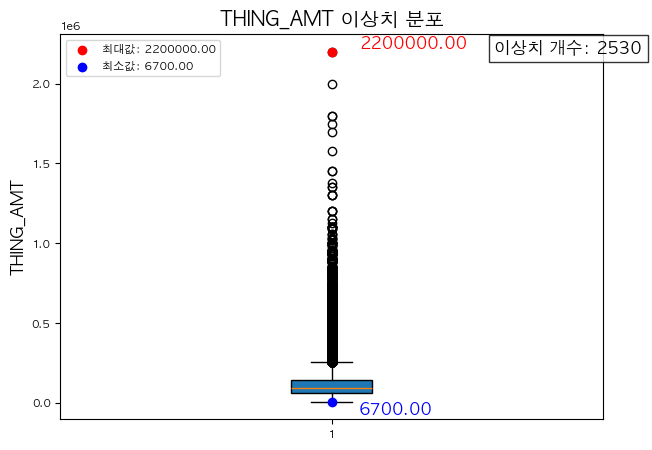

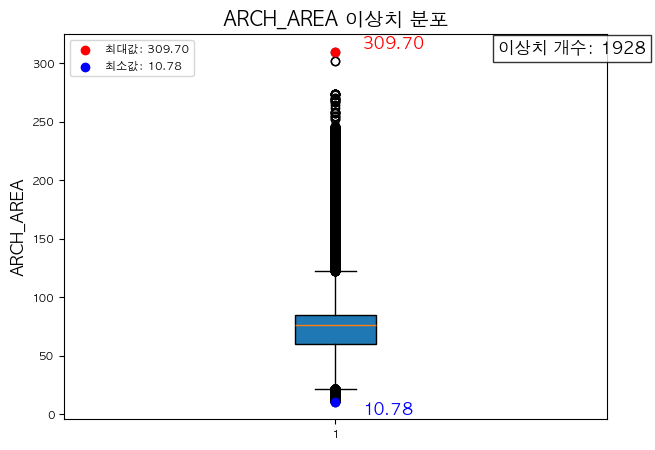

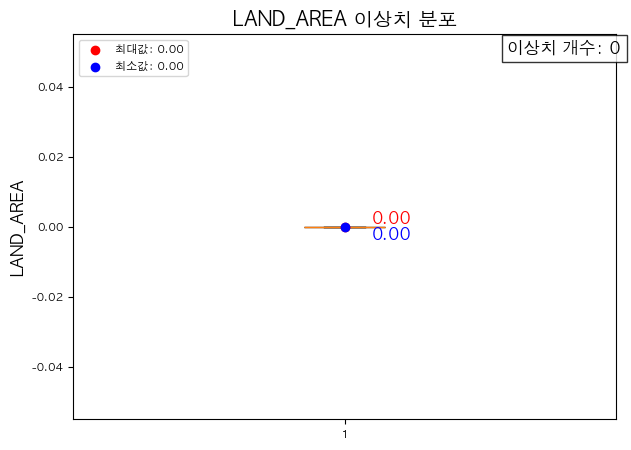

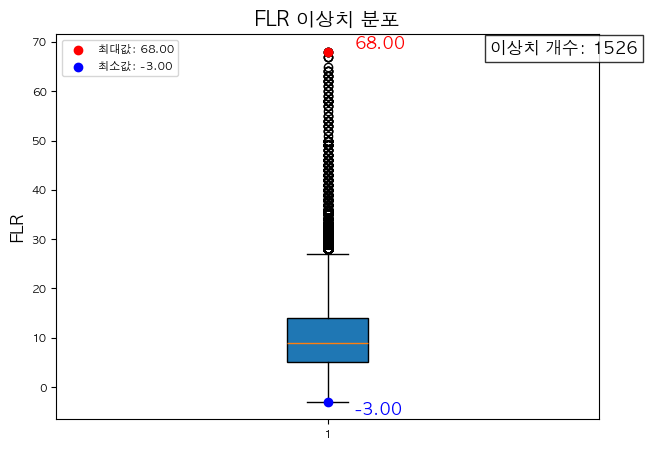

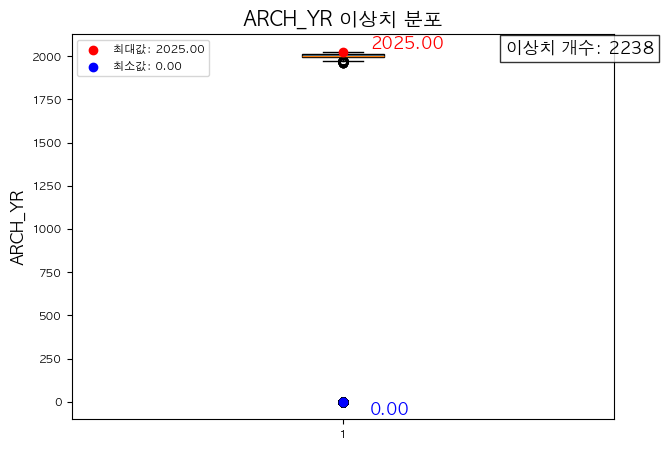

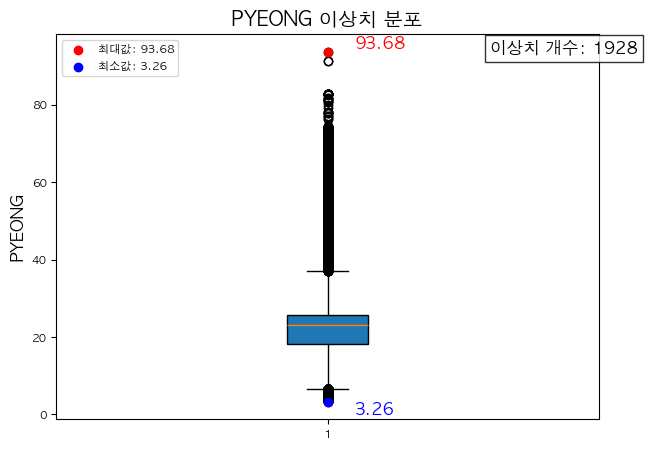

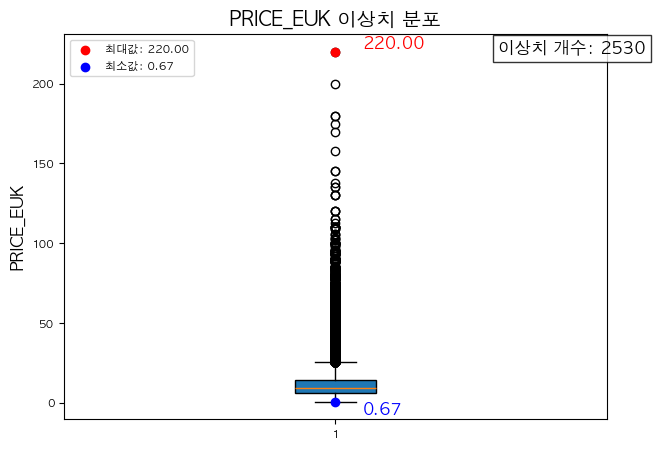

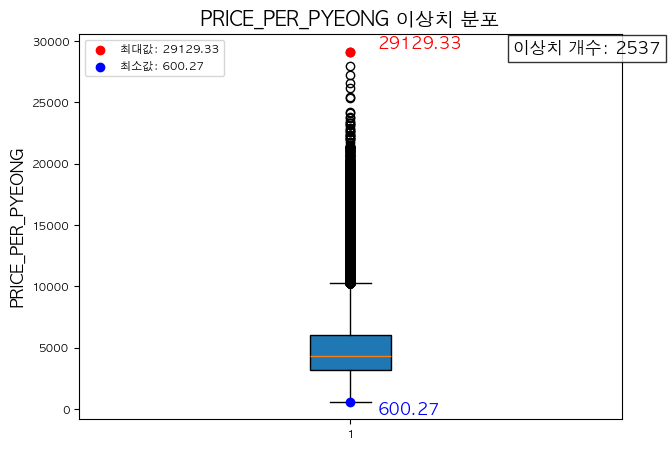

In [45]:
numeric_cols = ['THING_AMT', 'ARCH_AREA', 'LAND_AREA', 'FLR', 'ARCH_YR', 'PYEONG', 'PRICE_EUK', 'PRICE_PER_PYEONG']

for i in numeric_cols:
    z_score = (apart_df[i] - apart_df[i].mean()) / apart_df[i].std()
    outliers = apart_df[np.abs(z_score) > 3]

    data = apart_df[i].dropna()
    max_idx = data.idxmax()
    min_idx = data.idxmin()
    max_val = data[max_idx]
    min_val = data[min_idx]

    # 박스플롯 생성 (원본 데이터 전체)
    plt.figure(figsize=(7, 5))
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.boxplot(apart_df[i].dropna(),  # NaN 제거
                vert=True, 
                patch_artist=True,
                showfliers=True)  # 이상치 표시
    
    # 레이블 설정
    plt.title(f'{i} 이상치 분포', fontsize=14)
    plt.ylabel(i, fontsize=12)
    
    # 이상치 개수 표시
    plt.text(0.8, 0.95, f'이상치 개수: {len(outliers)}', 
             transform=plt.gca().transAxes,
             fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    # 최대값, 최소값 표시 (박스플롯은 x축이 1이므로 x=1에 표시)
    plt.scatter(1, max_val, color='red', label=f'최대값: {max_val:.2f}', zorder=3)
    plt.scatter(1, min_val, color='blue', label=f'최소값: {min_val:.2f}', zorder=3)

    # 최대값, 최소값 옆에 숫자 표시!
    plt.text(1.05, max_val, f'{max_val:.2f}', color='red', fontsize=12, verticalalignment='bottom')
    plt.text(1.05, min_val, f'{min_val:.2f}', color='blue', fontsize=12, verticalalignment='top')
    
    plt.legend()
    plt.show()

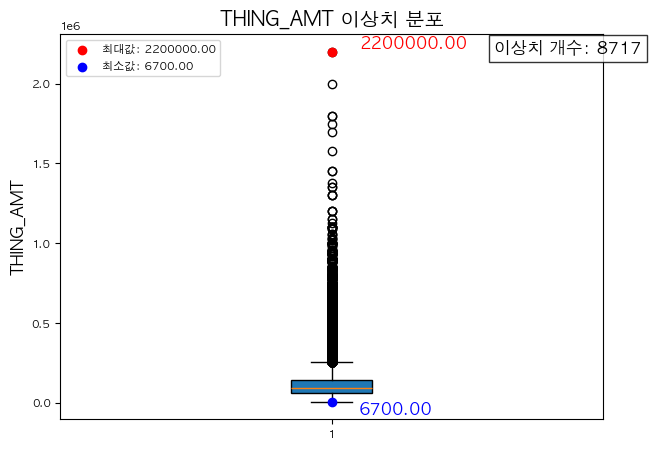

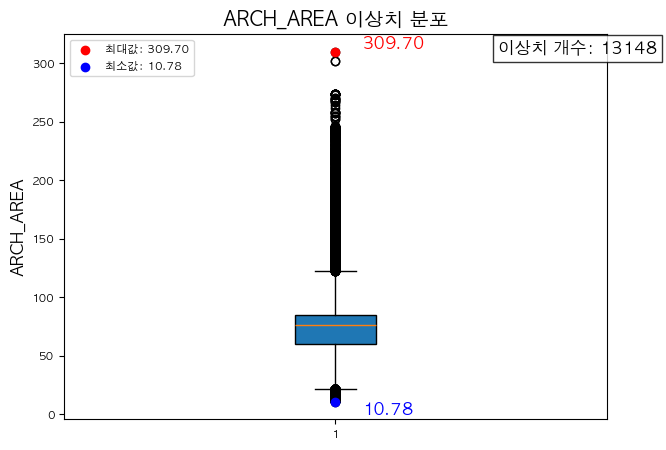

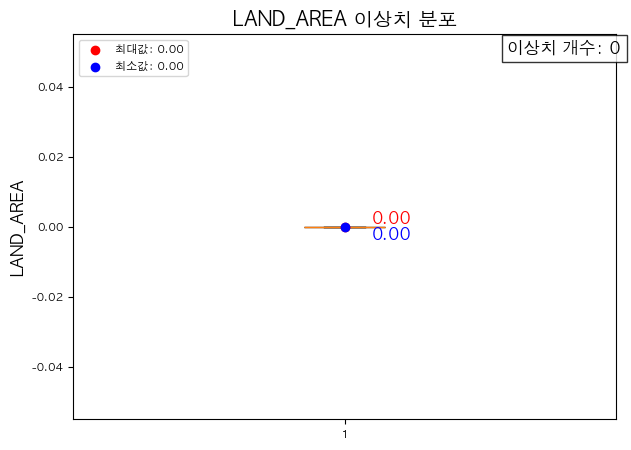

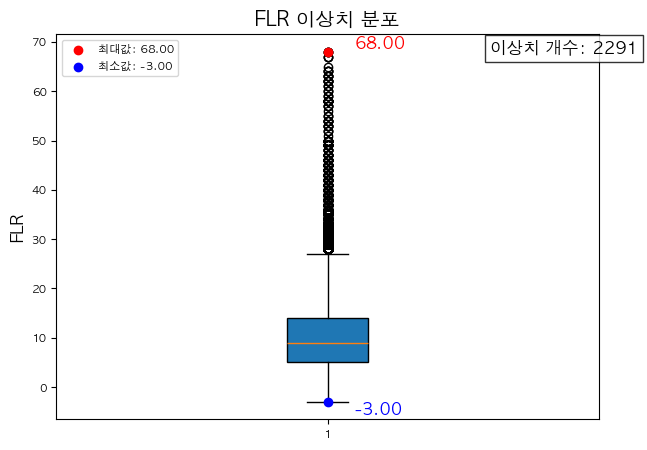

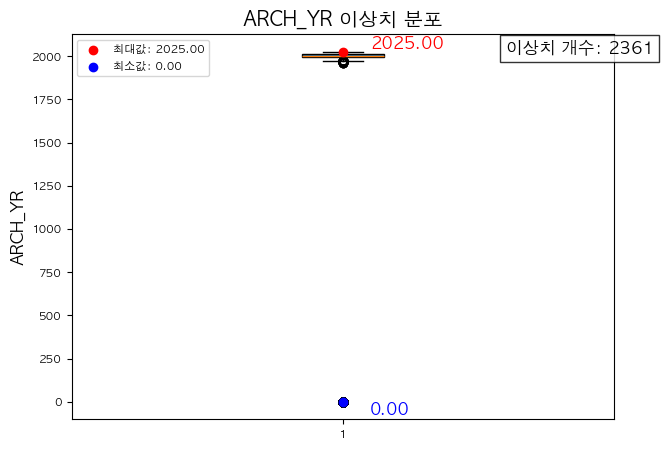

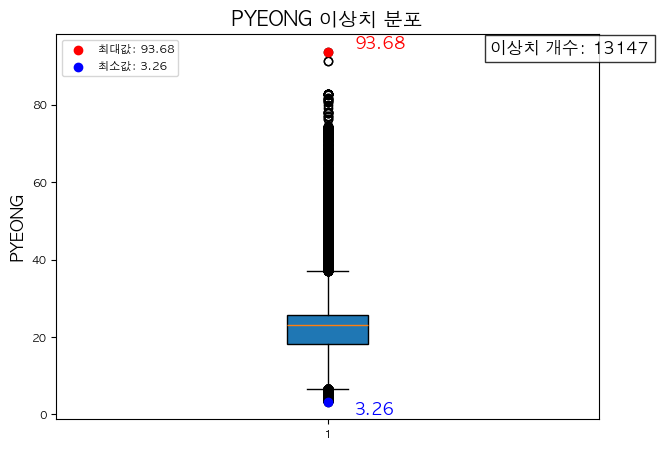

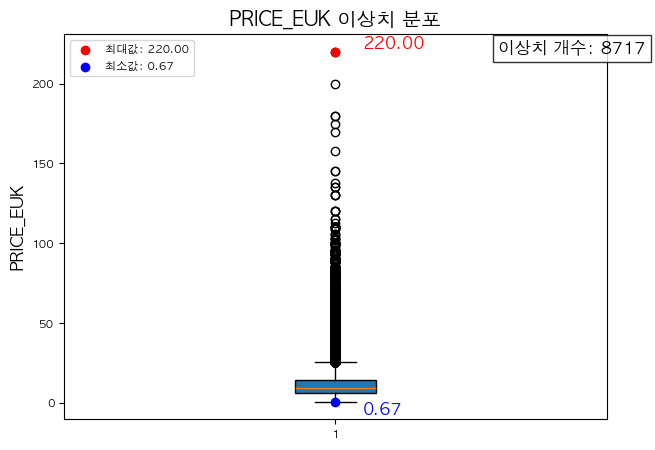

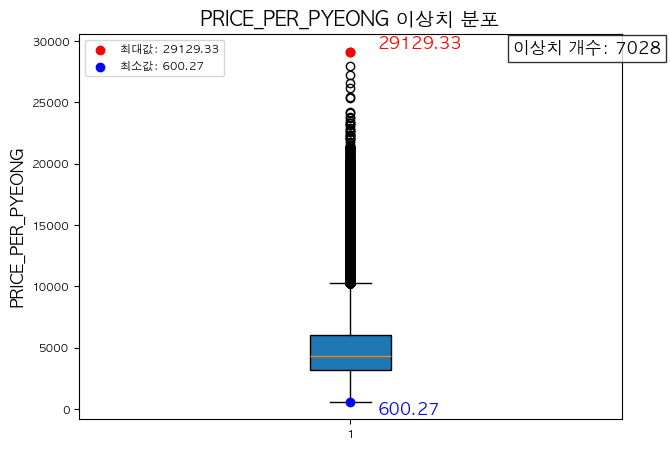

In [46]:
numeric_cols = ['THING_AMT', 'ARCH_AREA', 'LAND_AREA', 'FLR', 'ARCH_YR', 'PYEONG', 'PRICE_EUK', 'PRICE_PER_PYEONG']

for i in numeric_cols:
    # IQR 계산
    Q1 = apart_df[i].quantile(0.25)
    Q3 = apart_df[i].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 탐지
    outliers = apart_df[(apart_df[i] < Q1 - 1.5 * IQR) | (apart_df[i] > Q3 + 1.5 * IQR)]

    data = apart_df[i].dropna()
    max_idx = data.idxmax()
    min_idx = data.idxmin()
    max_val = data[max_idx]
    min_val = data[min_idx]

    # 박스플롯 생성 (원본 데이터 전체)
    plt.figure(figsize=(7, 5))
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.boxplot(apart_df[i].dropna(),  # NaN 제거
                vert=True, 
                patch_artist=True,
                showfliers=True)  # 이상치 표시
    
    # 레이블 설정
    plt.title(f'{i} 이상치 분포', fontsize=14)
    plt.ylabel(i, fontsize=12)
    
    # 이상치 개수 표시
    plt.text(0.8, 0.95, f'이상치 개수: {len(outliers)}', 
             transform=plt.gca().transAxes,
             fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    # 최대값, 최소값 표시 (박스플롯은 x축이 1이므로 x=1에 표시)
    plt.scatter(1, max_val, color='red', label=f'최대값: {max_val:.2f}', zorder=3)
    plt.scatter(1, min_val, color='blue', label=f'최소값: {min_val:.2f}', zorder=3)

    # 최대값, 최소값 옆에 숫자 표시!
    plt.text(1.05, max_val, f'{max_val:.2f}', color='red', fontsize=12, verticalalignment='bottom')
    plt.text(1.05, min_val, f'{min_val:.2f}', color='blue', fontsize=12, verticalalignment='top')
    
    plt.legend()
    plt.show()

In [98]:
# 데이터 불러오기
apart_df = pd.read_csv("../data/new_apart_data_preprocessing.csv")
apart_df.drop(columns=['Unnamed: 0', 'price_per_pyeong'], inplace=True)


In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

X = apart_df.drop('price_euk', axis=1)  # 입력 데이터(속성)
y = apart_df['price_euk']               # 타겟(거래금액)

# 랜덤포레스트 모델 학습
model = RandomForestRegressor(random_state=0)
model.fit(X, y)

# 속성 중요도 가져오기
importances = model.feature_importances_
feature_names = X.columns

# 판다스 시리즈로 변환해서 정렬
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=True)


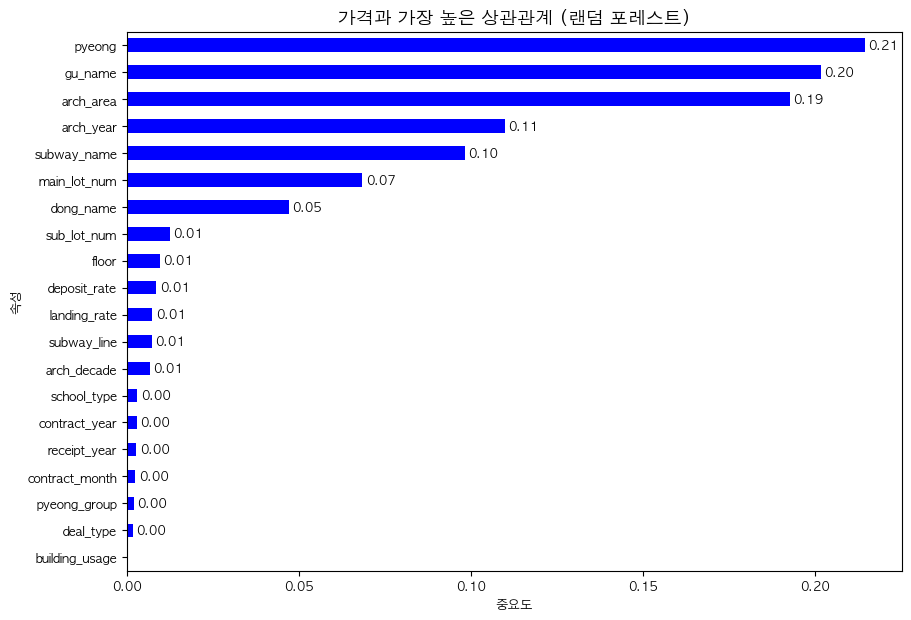

In [100]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# 1. 폰트 설정 (애플고딕, macOS)
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 폰트
plt.rcParams['font.size'] = 9                # 전체 폰트 크기
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지

# 가로 막대그래프 그리기
plt.figure(figsize=(10, 7))
ax = feat_importances.plot(kind='barh', color='blue')  # barh: 가로 막대그래프
plt.title('가격과 가장 높은 상관관계 (랜덤 포레스트)', fontsize = 13)
plt.xlabel('중요도')
plt.ylabel('속성')

for bar in ax.patches:
    width = bar.get_width()
    if width >= 0.001:
        plt.text(
            width + 0.001,
            bar.get_y() + bar.get_height() / 2, 
            f'{width:.2f}',
            ha='left', va='center',
            color='black', fontsize=9, fontweight='bold'
        )
plt.show()

In [101]:
# 1. 피어슨 상관계수 기반 상관관계 분석
correlations = apart_df.corr(numeric_only=True)  # 숫자형 컬럼만 상관계수 계산
target_corr = correlations['price_euk'].drop('price_euk')  # 타겟과 각 변수의 상관계수만 추출
top_corr = target_corr.abs().sort_values(ascending=False)  # 절댓값 기준 내림차순 정렬

print("피어슨 상관관계 기준 상위 변수:")
print(top_corr.head(10))  # 상위 10개 변수

# 2. SelectKBest + f_regression (통계적 선형 회귀 기반)
X = apart_df.drop('price_euk', axis=1).select_dtypes(include=[np.number])  # 숫자형만 사용
y = apart_df['price_euk']

selector = SelectKBest(score_func=f_regression, k=10)  # 상위 10개 변수 선택
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

# print("\nSelectKBest(f_regression) 기준 상위 변수:")
# for name, score in zip(selected_features, scores):
#     print(f"{name}: {score:.2f}")

피어슨 상관관계 기준 상위 변수:
pyeong           0.623526
arch_area        0.623526
pyeong_group     0.599383
gu_name          0.344600
subway_line      0.252122
school_type      0.213007
floor            0.181209
deal_type        0.133789
receipt_year     0.112610
contract_year    0.109650
Name: price_euk, dtype: float64


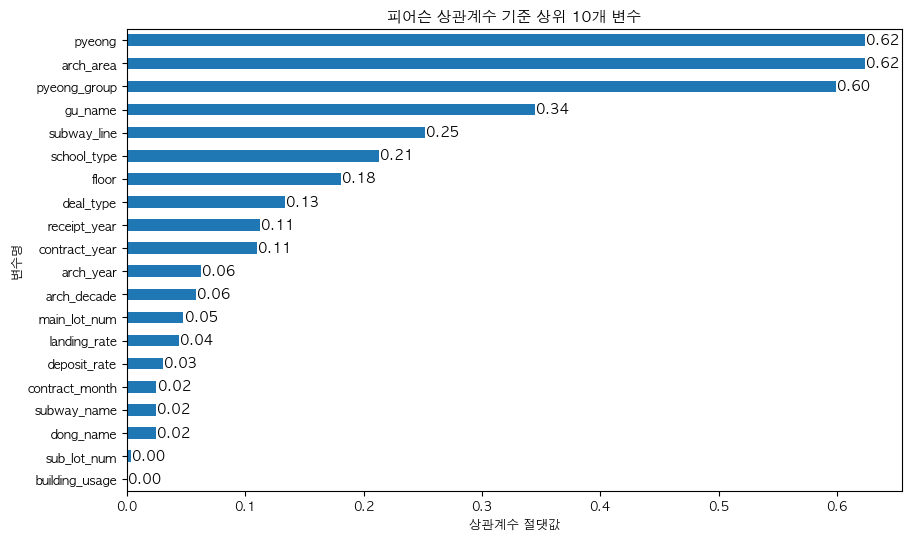

In [102]:
# top_corr: 피어슨 상관계수 절댓값 기준 상위 10개 Series (index=변수명, value=상관계수)
plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh')
plt.title('피어슨 상관계수 기준 상위 10개 변수')
plt.xlabel('상관계수 절댓값')
plt.ylabel('변수명')

ax = plt.gca()
for bar in ax.patches:
    width = bar.get_width()
    plt.text(
        width + 0.001,  # 막대 끝 오른쪽에 숫자 표시
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f}',
        ha='left', va='center', fontsize=10
    )

plt.gca().invert_yaxis()  # 상위 값이 위로 오도록
plt.show()

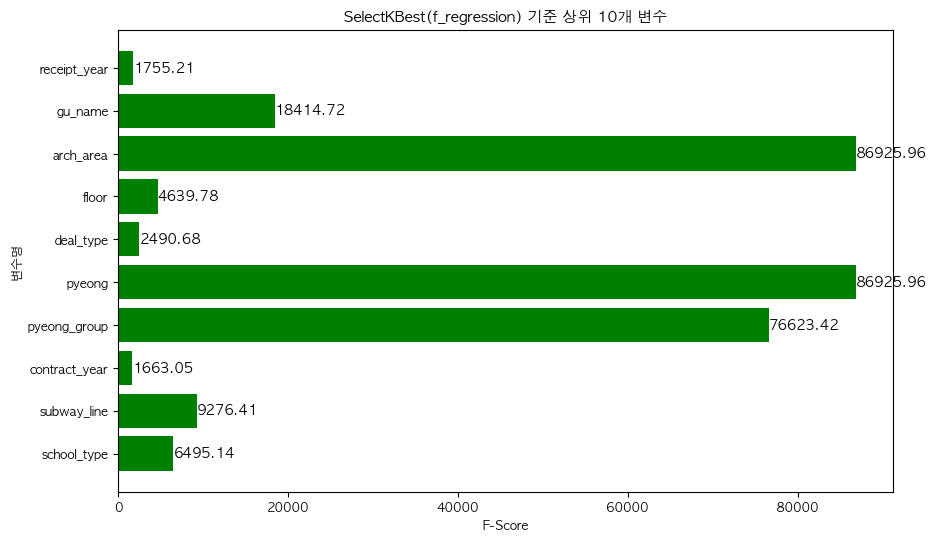

In [103]:
# selected_features: 변수명 리스트, scores: f_regression 점수 리스트
plt.figure(figsize=(10, 6))
plt.barh(selected_features, scores, color='green')
plt.title('SelectKBest(f_regression) 기준 상위 10개 변수')
plt.xlabel('F-Score')
plt.ylabel('변수명')

ax = plt.gca()
for bar in ax.patches:
    width = bar.get_width()
    plt.text(
        width + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f}',
        ha='left', va='center', fontsize=10
    )

plt.gca().invert_yaxis()
plt.show()